In [1]:
import os, shutil
import random
import time
import uuid
import cv2

In [23]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [16]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [75]:
images = tf.data.Dataset.list_files('data/images/*.jpg')

In [76]:
images.as_numpy_iterator().next()

b'data\\images\\f550d1c4-7172-11ed-b710-f434f0e25b32.jpg'

In [81]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [73]:
images = images.map(load_image)

NameError: name 'images' is not defined

In [79]:
images.as_numpy_iterator().next()

array([[[ 88,  98, 100],
        [ 86,  96,  98],
        [ 86,  96,  98],
        ...,
        [157, 160, 153],
        [155, 157, 152],
        [152, 154, 149]],

       [[ 88,  98, 100],
        [ 87,  97,  99],
        [ 87,  97,  99],
        ...,
        [156, 159, 152],
        [154, 156, 151],
        [152, 154, 149]],

       [[ 88,  98,  99],
        [ 88,  98,  99],
        [ 89,  99, 100],
        ...,
        [154, 157, 150],
        [152, 155, 148],
        [151, 154, 147]],

       ...,

       [[ 73,  79,  77],
        [ 73,  79,  77],
        [ 71,  80,  77],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 74,  80,  78],
        [ 73,  79,  77],
        [ 71,  80,  77],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 74,  80,  78],
        [ 73,  79,  77],
        [ 71,  80,  77],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

In [80]:
type(images), len(images)

(tensorflow.python.data.ops.dataset_ops.MapDataset, 35)

In [81]:
image_generator = images.batch(5).as_numpy_iterator()

In [82]:
plot_images = image_generator.next()

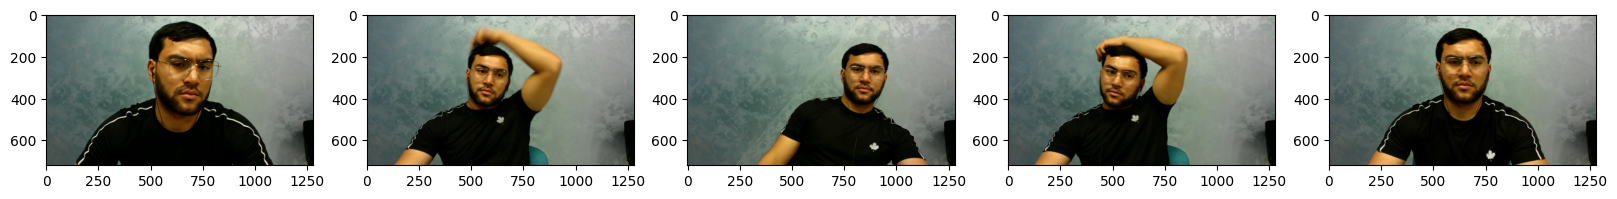

In [83]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, image in enumerate(plot_images):
    # im = str(image)[2:-1]
    # image = plt.imread(im)
    ax[idx].imshow(image)
plt.show()

In [158]:
images_dir = os.listdir(os.path.join('data', 'images'))
images_dir

['e5c36da2-7172-11ed-b710-f434f0e25b32.jpg',
 'e627993a-7172-11ed-b710-f434f0e25b32.jpg',
 'e6826536-7172-11ed-b710-f434f0e25b32.jpg',
 'e6d8cb24-7172-11ed-b710-f434f0e25b32.jpg',
 'e732618e-7172-11ed-b710-f434f0e25b32.jpg',
 'efcee11e-7172-11ed-b710-f434f0e25b32.jpg',
 'f0243b14-7172-11ed-b710-f434f0e25b32.jpg',
 'f07f25ce-7172-11ed-b710-f434f0e25b32.jpg',
 'f0d68404-7172-11ed-b710-f434f0e25b32.jpg',
 'f12f3e0a-7172-11ed-b710-f434f0e25b32.jpg',
 'f18b3098-7172-11ed-b710-f434f0e25b32.jpg',
 'f1df270c-7172-11ed-b710-f434f0e25b32.jpg',
 'f235943e-7172-11ed-b710-f434f0e25b32.jpg',
 'f28f70e4-7172-11ed-b710-f434f0e25b32.jpg',
 'f2e51576-7172-11ed-b710-f434f0e25b32.jpg',
 'f33f8b1e-7172-11ed-b710-f434f0e25b32.jpg',
 'f39a4c70-7172-11ed-b710-f434f0e25b32.jpg',
 'f3efe2c0-7172-11ed-b710-f434f0e25b32.jpg',
 'f44ad892-7172-11ed-b710-f434f0e25b32.jpg',
 'f4a036f2-7172-11ed-b710-f434f0e25b32.jpg',
 'f4faa650-7172-11ed-b710-f434f0e25b32.jpg',
 'f550d1c4-7172-11ed-b710-f434f0e25b32.jpg',
 'f5ab44ba

In [159]:
list_data_trin = []
for _ in range(22):
    fil_random = random.choice(images_dir)
    list_data_trin.append(fil_random)
    images_dir.remove(fil_random)

In [161]:
for file in list_data_trin:
    existing_filepath = os.path.join('data', 'images', file)
    new_filepath = os.path.join('data', 'train', 'images', file)
    os.replace(existing_filepath, new_filepath)

In [169]:
images_dir = os.listdir(os.path.join('data', 'images'))
images_dir

['e6d8cb24-7172-11ed-b710-f434f0e25b32.jpg',
 'e732618e-7172-11ed-b710-f434f0e25b32.jpg',
 'f12f3e0a-7172-11ed-b710-f434f0e25b32.jpg',
 'f18b3098-7172-11ed-b710-f434f0e25b32.jpg',
 'f44ad892-7172-11ed-b710-f434f0e25b32.jpg',
 'f550d1c4-7172-11ed-b710-f434f0e25b32.jpg',
 'f6009226-7172-11ed-b710-f434f0e25b32.jpg',
 'f6b158fe-7172-11ed-b710-f434f0e25b32.jpg',
 'f7bc90a6-7172-11ed-b710-f434f0e25b32.jpg',
 'f8121526-7172-11ed-b710-f434f0e25b32.jpg',
 'f86ca036-7172-11ed-b710-f434f0e25b32.jpg',
 'f97754ee-7172-11ed-b710-f434f0e25b32.jpg',
 'f9cccb0e-7172-11ed-b710-f434f0e25b32.jpg']

In [170]:
list_data_test = []
for _ in range(7):
    fil_random = random.choice(images_dir)
    list_data_test.append(fil_random)
    images_dir.remove(fil_random)

In [171]:
for file in list_data_test:
    existing_filepath = os.path.join('data', 'images', file)
    new_filepath = os.path.join('data', 'test', 'images', file)
    os.replace(existing_filepath, new_filepath)

In [172]:
images_dir = os.listdir(os.path.join('data', 'images'))
images_dir

['f18b3098-7172-11ed-b710-f434f0e25b32.jpg',
 'f44ad892-7172-11ed-b710-f434f0e25b32.jpg',
 'f550d1c4-7172-11ed-b710-f434f0e25b32.jpg',
 'f6009226-7172-11ed-b710-f434f0e25b32.jpg',
 'f6b158fe-7172-11ed-b710-f434f0e25b32.jpg',
 'f9cccb0e-7172-11ed-b710-f434f0e25b32.jpg']

In [173]:
for file in images_dir:
    existing_filepath = os.path.join('data', 'images', file)
    new_filepath = os.path.join('data', 'val', 'images', file)
    os.replace(existing_filepath, new_filepath)

In [175]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [16]:
import albumentations as A

In [17]:
augmentor = A.Compose([A.RandomCrop(width=700, height=700),
                         A.HorizontalFlip(p=0.5),
                         A.RandomBrightnessContrast(p=0.2),
                         A.RandomGamma(p=0.2),
                         A.RGBShift(p=0.2),
                         A.VerticalFlip(p=0.5)],
                        bbox_params=A.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

In [297]:
img = cv2.imread(os.path.join('data', 'train', 'images', 'e5c36da2-7172-11ed-b710-f434f0e25b32.jpg'))
# img = cv2.resize(img, (520, 1080))
img.shape

(720, 1280, 3)

In [298]:
with open(os.path.join('data', 'train', 'labels','e5c36da2-7172-11ed-b710-f434f0e25b32.json'), 'r') as file:
    label = json.load(file)

In [299]:
label['shapes'][0]['points']

[[465.0, 20.820895522388085], [804.5522388059701, 489.4776119402985]]

In [300]:
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords

[465.0, 20.820895522388085, 804.5522388059701, 489.4776119402985]

In [301]:
coords1 = list(np.divide(coords, [640, 480, 640, 480]))
coords1

[0.7265625, 0.04337686567164185, 1.2571128731343282, 1.019745024875622]

In [302]:
coords2 = list(np.divide(coords, [1280,720,1280,720]))
coords2

[0.36328125, 0.02891791044776123, 0.6285564365671641, 0.679830016583748]

In [303]:
augmented = augmentor(image=img, bboxes=[coords2], class_labels=['face'])

In [304]:
augmented['bboxes']

[(0.08571428571428572,
  0.018315565031982978,
  0.5707889125799572,
  0.6878251599147122)]

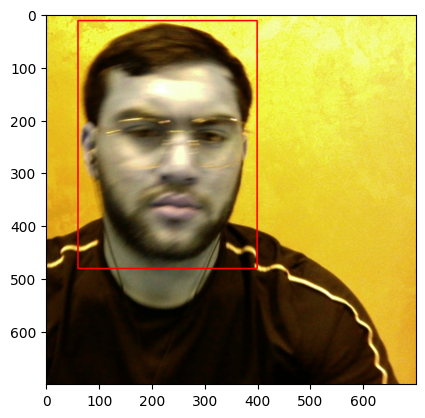

In [305]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [700,700]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [700,700]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [68]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))
        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1280,720,1280,720]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.6133978544776119, 0.6031301824212272, 0.39126632462686567, 0.08592454394693204, 'face'].
x_max is less than or equal to x_min for bbox [0.6373017723880596, 0.5689262023217247, 0.3766907649253731, 0.07866915422885576, 'face'].
x_max is less than or equal to x_min for bbox [0.648379197761194, 0.7275082918739636, 0.38718516791044777, 0.10354477611940302, 'face'].
x_max is less than or equal to x_min for bbox [0.7568213619402984, 0.6062396351575455, 0.5685051305970148, 0.18750000000000003, 'face'].
x_max is less than or equal to x_min for bbox [0.7404967350746268, 0.6124585406301825, 0.5609258395522387, 0.25279850746268656, 'face'].
x_max is less than or equal to x_min for bbox [0.5084538246268656, 0.6207504145936982, 0.29623367537313433, 0.2486525704809287, 'face'].
x_max is less than or equal to x_min for bbox [0.49795942164179097, 0.6166044776119404, 0.3498717350746269, 0.2393242122719735, 'face'].


In [67]:
def delete_file():
    for y in ['train','test','val']:
        for z in ['images', 'labels']:
            for x in os.listdir(fr'aug_data\{y}\{z}'):
                os.remove(fr'aug_data\{y}\{z}\{x}')

In [120]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (330,330)))
train_images = train_images.map(lambda x: x/255)

In [121]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (330,330)))
test_images = test_images.map(lambda x: x/255)

In [122]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (330,330)))
val_images = val_images.map(lambda x: x/255)

In [123]:
train_images.as_numpy_iterator().next()

array([[[0.07134537, 0.55100924, 0.8137543 ],
        [0.07510938, 0.5550397 , 0.8177848 ],
        [0.06252453, 0.54448676, 0.79762334],
        ...,
        [0.        , 0.10726608, 0.18832   ],
        [0.        , 0.11097889, 0.18156713],
        [0.        , 0.10292688, 0.1808829 ]],

       [[0.06461406, 0.5537136 , 0.8130854 ],
        [0.06211311, 0.5519121 , 0.8028925 ],
        [0.07778587, 0.56773615, 0.8187165 ],
        ...,
        [0.        , 0.11247772, 0.17722684],
        [0.        , 0.10673319, 0.1694783 ],
        [0.        , 0.10023792, 0.16690458]],

       [[0.05293307, 0.5548939 , 0.8019527 ],
        [0.05109923, 0.55306   , 0.807962  ],
        [0.05727867, 0.55923945, 0.81414145],
        ...,
        [0.        , 0.10665479, 0.16155674],
        [0.        , 0.10588235, 0.16078432],
        [0.        , 0.10588235, 0.16078432]],

       ...,

       [[0.10168883, 0.70953196, 0.9683555 ],
        [0.10623073, 0.7140739 , 0.9728974 ],
        [0.08192958, 0

In [124]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [125]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [126]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [127]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [128]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.537 , 0.315 , 1.    , 0.9844], dtype=float16))

In [139]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1020, 1020, 360, 360, 300, 300)

In [140]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(1500)
train = train.batch(8)
train = train.prefetch(4)

In [141]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(480)
test = test.batch(8)
test = test.prefetch(4)

In [142]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(420)
val = val.batch(8)
val = val.prefetch(4)

In [143]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.1512 , 0.1072 , 0.628  , 0.749  ],
        [0.3828 , 0.02689, 0.868  , 0.6963 ],
        [0.4602 , 0.463  , 0.905  , 0.927  ],
        [0.     , 0.03574, 0.3293 , 0.666  ],
        [0.75   , 0.1913 , 1.     , 0.607  ],
        [0.     , 0.0329 , 0.3726 , 0.71   ],
        [0.663  , 0.291  , 1.     , 0.9243 ],
        [0.5884 , 0.01546, 1.     , 0.685  ]], dtype=float16))

In [144]:
data_samples = train.as_numpy_iterator()

In [155]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


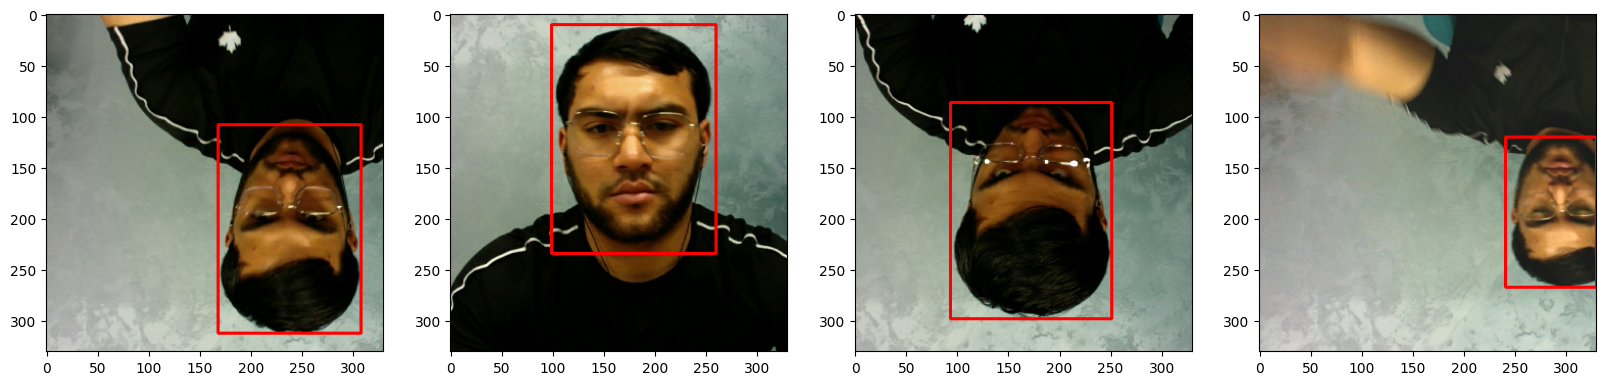

In [156]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [330,330]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [330,330]).astype(int)),
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [10]:
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from keras.applications import VGG16

In [159]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 12s 0us/step


In [160]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [209]:
def build_model():
    input_layer = Input(shape=(330,330,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [210]:
facetracker = build_model()

In [211]:
facetracker.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 330, 330, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_6[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d_4 (Global  (None, 512)         0           ['vgg16[0][0]']                  
 MaxPooling2D)                                                                              

In [212]:
X, y = train.as_numpy_iterator().next()

In [213]:
X.shape

(8, 330, 330, 3)

In [214]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 260ms/step


In [215]:
classes, coords

(array([[0.6599288 ],
        [0.74072623],
        [0.6940793 ],
        [0.70698816],
        [0.6767202 ],
        [0.70797616],
        [0.6656349 ],
        [0.6633872 ]], dtype=float32),
 array([[0.48851776, 0.79221225, 0.73511815, 0.5410229 ],
        [0.39995155, 0.73841757, 0.69422126, 0.5660989 ],
        [0.5270323 , 0.83059716, 0.7790966 , 0.5811234 ],
        [0.37359354, 0.78452384, 0.74485904, 0.561752  ],
        [0.3322298 , 0.77375764, 0.71328425, 0.5673408 ],
        [0.45276308, 0.7594911 , 0.73130697, 0.47178733],
        [0.39613992, 0.7502639 , 0.7041191 , 0.5529242 ],
        [0.34540516, 0.8034485 , 0.7311134 , 0.51991343]], dtype=float32))

In [216]:
batches_per_epoch = len(train)
lr_decay = (1 / 0.75 -1) / batches_per_epoch

In [217]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)
opt

In [218]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [219]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [220]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.228403>

In [221]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.37261367>

In [222]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.228403>

In [223]:
class FaceTracker(Model):
    def __init__(self, eyetracker,  **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):

        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5 * batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [224]:
model = FaceTracker(facetracker)

In [225]:
model.compile(opt, classloss, regressloss)

In [227]:
logdir='logs'

In [228]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [229]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
128/128 [==============================] - 70s 377ms/step - total_loss: 0.4080 - class_loss: 0.0223 - regress_loss: 0.3968 - val_total_loss: 0.1032 - val_class_loss: 1.3049e-04 - val_regress_loss: 0.1031
Epoch 2/10
128/128 [==============================] - 47s 347ms/step - total_loss: 0.0569 - class_loss: 0.0097 - regress_loss: 0.0520 - val_total_loss: 0.0182 - val_class_loss: 7.6788e-04 - val_regress_loss: 0.0178
Epoch 3/10
128/128 [==============================] - 45s 335ms/step - total_loss: 0.0324 - class_loss: 0.0062 - regress_loss: 0.0293 - val_total_loss: 0.0265 - val_class_loss: 2.3690e-04 - val_regress_loss: 0.0264
Epoch 4/10
128/128 [==============================] - 45s 335ms/step - total_loss: 0.0226 - class_loss: 0.0042 - regress_loss: 0.0204 - val_total_loss: 0.0105 - val_class_loss: 8.9074e-05 - val_regress_loss: 0.0105
Epoch 5/10
128/128 [==============================] - 45s 336ms/step - total_loss: 0.0158 - class_loss: 0.0027 - regress_loss: 0.0144 - val_

In [230]:
hist.history

{'total_loss': [0.08632496744394302,
  0.008004697971045971,
  0.010635778307914734,
  0.006670467555522919,
  0.004913558252155781,
  0.004228804726153612,
  0.0037121197674423456,
  0.003090951591730118,
  0.001893440494313836,
  0.0024207537062466145],
 'class_loss': [0.00031451566610485315,
  3.925125929526985e-05,
  8.406581764575094e-05,
  0.00012095423153368756,
  4.2233208660036325e-05,
  2.4855535230017267e-05,
  1.1980647286691237e-05,
  2.6822095833267667e-07,
  2.0265611055947375e-06,
  3.203930828021839e-05],
 'regress_loss': [0.08616770803928375,
  0.007985072210431099,
  0.010593745857477188,
  0.006609990261495113,
  0.004892441444098949,
  0.004216377157717943,
  0.003706129500642419,
  0.003090817481279373,
  0.0018924272153526545,
  0.0024047340266406536],
 'val_total_loss': [0.1031886488199234,
  0.018186397850513458,
  0.026480216532945633,
  0.010511183179914951,
  0.017204206436872482,
  0.010409912094473839,
  0.040636878460645676,
  0.03633840009570122,
  0.009

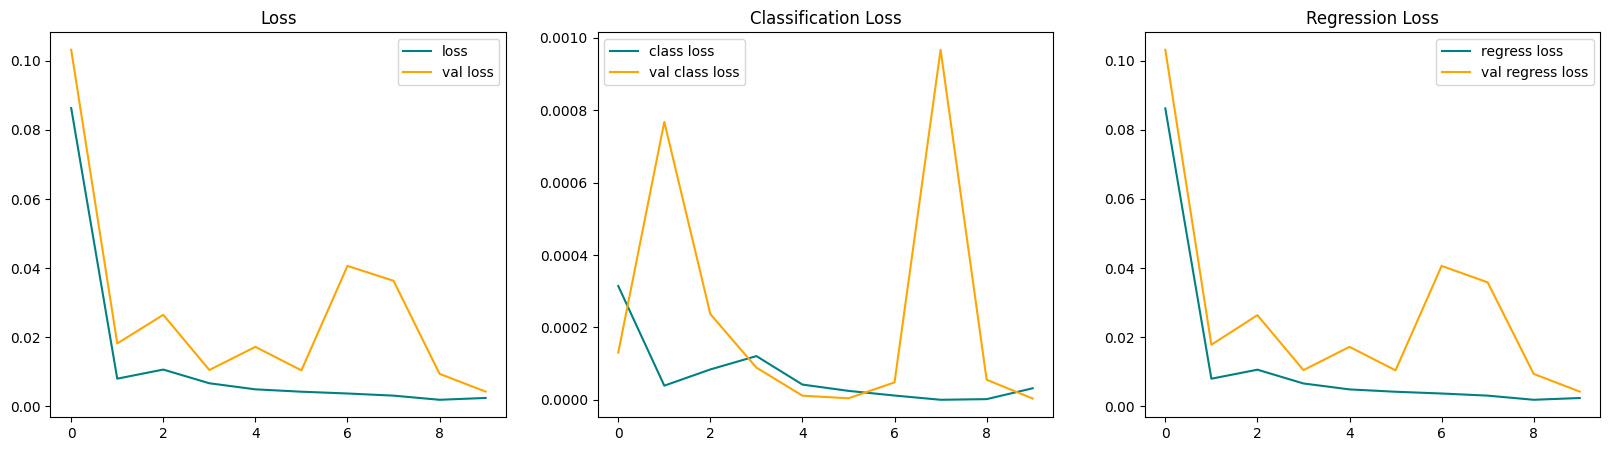

In [231]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [232]:
test_data = test.as_numpy_iterator()

In [16]:
test_sample = test_data.next()

NameError: name 'test_data' is not defined

In [260]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 43ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


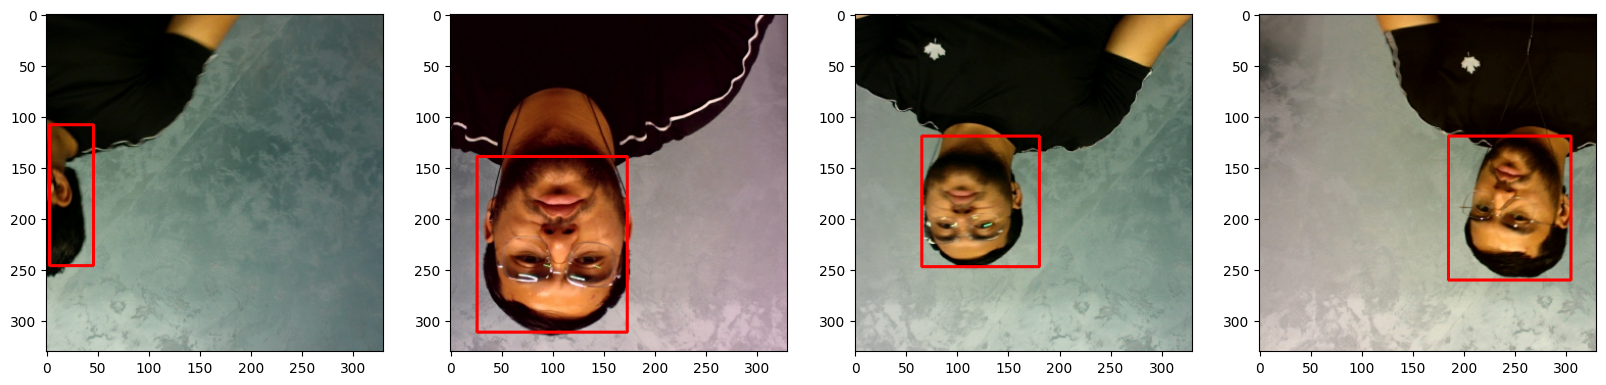

In [261]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [330,330]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [330,330]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [5]:
from keras.models import load_model

In [264]:
facetracker.save('facetracker.h5')

In [6]:
facetracker = load_model('facetracker.h5')

In [19]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[70:700, 70:700,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (330,330))

    yhat = facetracker.predict(np.expand_dims(resized / 255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [330,330]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [330,330]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [330,330]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [330,330]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [330,330]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 28ms/step
